In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
import pandas as pd

In [2]:
from sklearn.datasets import load_files
import numpy as np
DATADIR = "../dataset/fruits-360/Training"
DATADIR_test = "../dataset/fruits-360/Test"

CATEGORIES = ["Apple Braeburn","Apple Crimson Snow","Apple Golden 1","Apple Golden 2","Apple Golden 3",
              "Apple Granny Smith","Apple Pink Lady","Apple Red 1", "Apple Red 2","Apple Red 3","Apple Red Delicious",
              "Apple Red Yellow 1","Apple Red Yellow 2","Banana",
              "Plum","Plum 2", "Plum 3",
             "Pepper Yellow","Pepper Red","Pepper Green",
              "Cherry 1", "Cherry 2", "Cherry Rainier", "Cherry Wax Black", "Cherry Wax Red","Cherry Wax Yellow",
              "Grape Blue", "Grape Pink", "Grape White", "Grape White 2", "Grape White 3", "Grape White 4",
            "Tomato 1","Tomato 2","Tomato 3","Tomato 4","Tomato Yellow","Tomato Maroon",
            "Pear","Pear Abate","Pear Forelle","Pear Kaiser","Pear Monster","Pear Red","Pear Williams",
             "Peach","Peach 2","Peach Flat",
             "Potato Red", "Potato Red Washed","Potato White","Potato Sweet"
             ]

##TYPES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
TYPES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
fruits= {}
for cat in CATEGORIES:
    for typ in TYPES:
        if(cat.startswith(typ)):
            fruits[cat] = typ

In [3]:
def load_dataset(dire):
    lis_files = []
    lis_num_lab =[]
    lis_name_lab = []
    for category in CATEGORIES:
        path = os.path.join(dire,category)
        class_num =TYPES.index(fruits[category])

        class_name = fruits[category]
        for img in tqdm(os.listdir(path)):
               # print("OK: ",os.path.join(path,img) )
                lis_files.append(os.path.join(path,img))
                lis_name_lab.append(class_name)
                lis_num_lab.append(class_num)
                #print("path:  ",os.path.join(path,img)," \n Name: ",class_name," \n Id: ",class_num)

    return pd.DataFrame(list(zip(lis_files,lis_num_lab,lis_name_lab)),columns=('path','label_id',"label_name"))

all_train = load_dataset(DATADIR)
all_test = load_dataset(DATADIR_test)
#x_train, y_train,target_labels = load_dataset(DATADIR)
#x_test, y_test,_ = load_dataset(DATADIR_test)
#print('Loading complete!')

#print('Training set size : ' , x_train.shape[0])
#print('Testing set size : ', x_test.shape[0])

100%|██████████| 150/150 [00:00<00:00, 50071.28it/s]


In [4]:
all_train.sample(frac=1, axis=1).sample(frac=1).reset_index(drop=True)

,label_id,path,label_name
0,0,../dataset/fruits-360/Training\Apple Red Yello...,Apple
1,2,../dataset/fruits-360/Training\Plum 2\237_100.jpg,Plum
2,8,../dataset/fruits-360/Training\Pear Williams\2...,Pear
3,5,../dataset/fruits-360/Training\Grape Pink\r_25...,Grape
4,0,../dataset/fruits-360/Training\Apple Red 1\r_2...,Apple
...,...,...,...
27903,5,../dataset/fruits-360/Training\Grape White\r_2...,Grape
27904,0,../dataset/fruits-360/Training\Apple Red Yello...,Apple
27905,1,../dataset/fruits-360/Training\Banana\117_100.jpg,Banana
27906,6,../dataset/fruits-360/Training\Tomato 2\229_10...,Tomato


In [1]:
all_train = all_train.sample(frac=1, axis=1).sample(frac=1).reset_index(drop=True)
all_test = all_test.sample(frac=1, axis=1).sample(frac=1).reset_index(drop=True)

x_train = np.array(all_train["path"])
y_train = np.array(all_train["label_id"])
target_labels= np.array(all_train["label_name"])

x_test = np.array(all_test["path"])
y_test = np.array(all_test["label_id"])

NameError: name 'all_train' is not defined

In [7]:
x_train

array(['../dataset/fruits-360/Training\\Potato Red\\r2_55_100.jpg',
       '../dataset/fruits-360/Training\\Peach 2\\r2_46_100.jpg',
       '../dataset/fruits-360/Training\\Apple Golden 1\\r_280_100.jpg',
       ...,
       '../dataset/fruits-360/Training\\Cherry Rainier\\r2_71_100.jpg',
       '../dataset/fruits-360/Training\\Cherry Rainier\\r2_302_100.jpg',
       '../dataset/fruits-360/Training\\Cherry Wax Black\\r_206_100.jpg'],
      dtype=object)

In [8]:
target_labels

array(['Potato', 'Peach', 'Apple', ..., 'Cherry', 'Cherry', 'Cherry'],
      dtype=object)

In [9]:
y_train

array([7, 9, 0, ..., 4, 4, 4], dtype=int64)

In [10]:

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

y_train

(27908,)
(27908,)
(9335,)
(9335,)


array([7, 9, 0, ..., 4, 4, 4], dtype=int64)

In [11]:
from keras.utils import np_utils
no_of_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0]
print(no_of_classes)

Using TensorFlow backend.


10


In [12]:
# Now, we have to divide the validation set into test and validation set
x_test,x_valid = x_test[7000:],x_test[:7000]
y_test,y_vaild = y_test[7000:],y_test[:7000]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (7000,)
Vaildation y : (7000, 10)
Test X :  (2335,)
Test y :  (2335, 10)


In [13]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file,target_size=(32, 32))))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (27908, 32, 32, 3)
Validation set shape :  (7000, 32, 32, 3)
Test set shape :  (2335, 32, 32, 3)
1st training image shape  (32, 32, 3)


In [14]:
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255

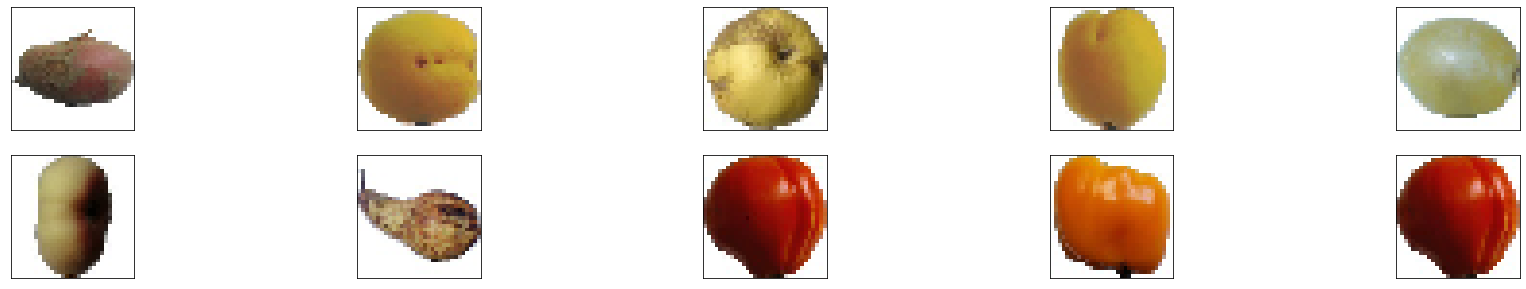

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [20]:
#DEFINE LENET MODEL
from tensorflow.keras.models import Sequential

class LeNet(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Flatten())
        self.add(Dense(120, activation='tanh'))
        self.add(Dense(84, activation='tanh'))
        self.add(Dense(nb_classes, activation='softmax'))

        self.compile(optimizer='adam',
                    loss= categorical_crossentropy,
                    metrics=['accuracy'])

In [22]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
num_classes = 10
input_shape = (32,32,3)
model = LeNet(input_shape, num_classes)
model.summary()

Model: "le_net_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               69240     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                101

In [25]:
from keras.callbacks import ModelCheckpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
tf.keras.callbacks.TensorBoard(log_dir='./logs')
callbacks_list = [checkpoint]

In [27]:
results = model.fit(x_train, y=y_train, 
          epochs=20, 
          validation_data=(x_valid, y_vaild), 
          callbacks= callbacks_list,
          verbose=1)

Train on 27908 samples, validate on 7000 samples
Epoch 1/20
27904/27908 [============================>.] - ETA: 0s - loss: 0.3426 - accuracy: 0.8970
Epoch 00001: val_accuracy improved from -inf to 0.95657, saving model to weights-improvement-01-0.96.hdf5
27908/27908 [==============================] - 75s 3ms/sample - loss: 0.3426 - accuracy: 0.8970 - val_loss: 0.1442 - val_accuracy: 0.9566
Epoch 2/20
27904/27908 [============================>.] - ETA: 0s - loss: 0.0087 - accuracy: 0.9994
Epoch 00002: val_accuracy improved from 0.95657 to 0.97686, saving model to weights-improvement-02-0.98.hdf5
27908/27908 [==============================] - 28s 1ms/sample - loss: 0.0087 - accuracy: 0.9994 - val_loss: 0.0893 - val_accuracy: 0.9769
Epoch 3/20
27872/27908 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 00003: val_accuracy did not improve from 0.97686
27908/27908 [==============================] - 28s 991us/sample - loss: 0.0017 - accuracy: 1.0000 - val_l

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9875803


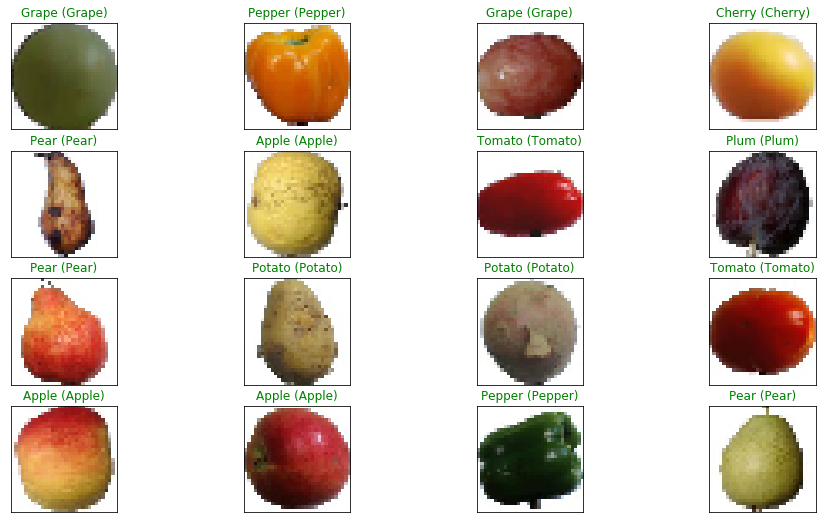

In [29]:

y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))